### Predicting the IMDB rating

## From IMDB movie review dataset, we are classifying if the movie is good or bad

Output:
    1. Good
    0. Bad

In [1]:
# Loading all the dependancies
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# Loading dataset from the imdb dataset
data = imdb.load_data()

In [3]:
# Splitting the dataset into train and test along with data and labels:
# num_words 10000 means that from dataset we are picking top 100000 influencing words
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [5]:
# word_index is a dictionary, mapping words to an integer index
word_index = imdb.get_word_index()

#Reverse the mapping, integer indices to words
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])

# Decodes the review, Note that the indices are offset by 3 because 0,1,2 are reversed indices for "padding",
# "Start of sequence" and "unknown"
decoded_review = ' '.join(reverse_word_index.get(i -3,'?') for i in train_data[0])


In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequences into a binary matrix

In [7]:
def vectorise_sequences(sequences, dimension=10000):
    # Create an all zero matrix of shape (len(sequences),dimension)
    results = np.zeros((len(sequences),dimension))
    # Setting specific indices of results[i] = 1
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [8]:
# Vectorising Training and testing data
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
# Vectorising the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the Network

In [11]:
model = models.Sequential()
model.add(layers.Dense(16,activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Setting aside a validation set

In [13]:
# Validation set splitting
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training  model

In [14]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 303us/step - loss: 0.5082 - acc: 0.7817 - val_loss: 0.3796 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 3s 207us/step - loss: 0.3005 - acc: 0.9049 - val_loss: 0.3003 - val_acc: 0.8904
Epoch 3/20
15000/15000 [==============================] - 3s 193us/step - loss: 0.2180 - acc: 0.9285 - val_loss: 0.3089 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.1751 - acc: 0.9437 - val_loss: 0.2837 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 4s 296us/step - loss: 0.1429 - acc: 0.9543 - val_loss: 0.2840 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 4s 247us/step - loss: 0.1153 - acc: 0.9649 - val_loss: 0.3170 - val_acc: 0.8775
Epoch 7/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.0983 - acc: 0.9707 - val_loss: 0.3122 -

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

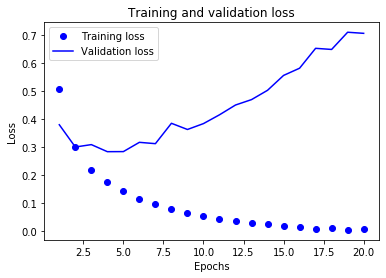

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

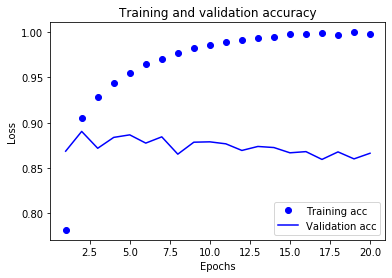

In [17]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Here We can see that the the training loss decreases with every epoch, and the training accuracy
increases with every epoch. Lets retrain the model for 4 epoch from scratch and check the result on y dataset.

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 5s 189us/step - loss: 0.4745 - acc: 0.8208
Epoch 2/4
25000/25000 [==============================] - 4s 143us/step - loss: 0.2671 - acc: 0.9092
Epoch 3/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.1990 - acc: 0.9289
Epoch 4/4
25000/25000 [==============================] - 9s 350us/step


In [19]:
results

[0.32241328889846804, 0.87336]

From results we can see that with this approach we will get an accuracy at around 87%. With some changes in the layer can help in incresing the accuracy to much extend

In [20]:
model.predict(x_test)

array([[0.13909644],
       [0.9997238 ],
       [0.2856785 ],
       ...,
       [0.0735155 ],
       [0.04216471],
       [0.46680117]], dtype=float32)

From above predicted value we can see that the lecture is much confident for some samples (e.g. where score is around 
0.99 or more, or 0.01 or less) which is very good. But for some samples, the score is very low (e.g. 0.6, 0.4), here the model is less confident.